# Cкачать файл 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression


In [4]:
df = pd.read_csv('kc_house_data.csv', encoding = 'latin-1')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# 1.2  Изучите стоимости недвижимости

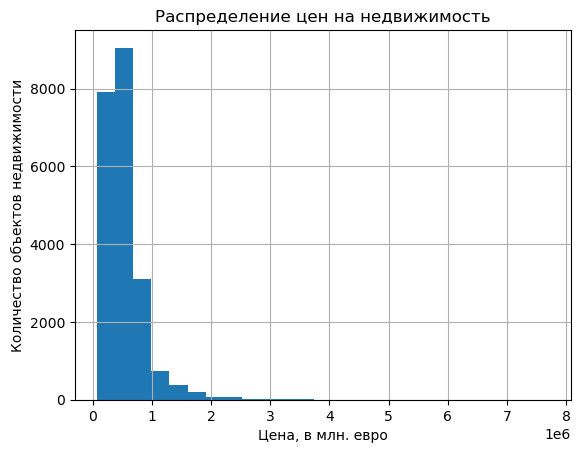

In [5]:
plt.hist(df['price'], bins=25)
plt.xlabel('Цена, в млн. евро')
plt.ylabel('Количество объектов недвижимости')
plt.title('Распределение цен на недвижимость');
plt.grid()

In [6]:
df.agg({'price': ['min', 'mean', 'max']}).style.format(precision=0, thousands=' ')

,price
min,75 000
mean,540 088
max,7 700 000


### Средняя стоимость ~  540 000 евро, максимум доходит почти до 8 млн евро. 


### Ограничим выбросы(возьмем стоимость домов до 4 млн евро):

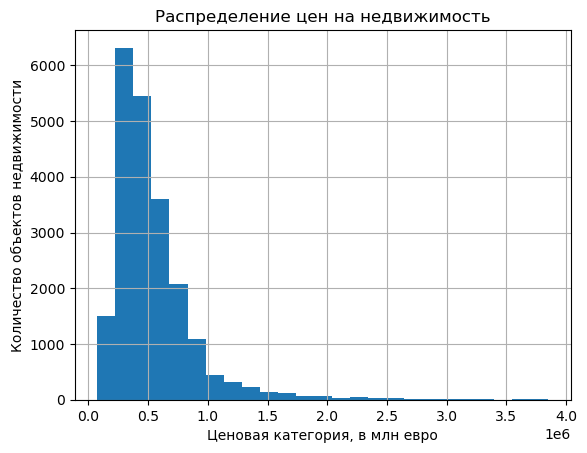

In [7]:
plt.hist(df.price[df.price < 4000000], bins=25)
plt.title('Распределение цен на недвижимость')
plt.xlabel('Ценовая категория, в млн евро')
plt.ylabel('Количество объектов недвижимости')
plt.grid();

#### Судя по графику, наибольшее число объектов недвижимости имеют стоимость около 400 тыс евро.


## 1.3 Изучите распределение квадратуры жилой

In [8]:
df.agg({'sqft_lot': ['min', 'mean', 'max']}).style.format(precision=0, thousands=' ')

,sqft_lot
min,520
mean,15 107
max,1 651 359


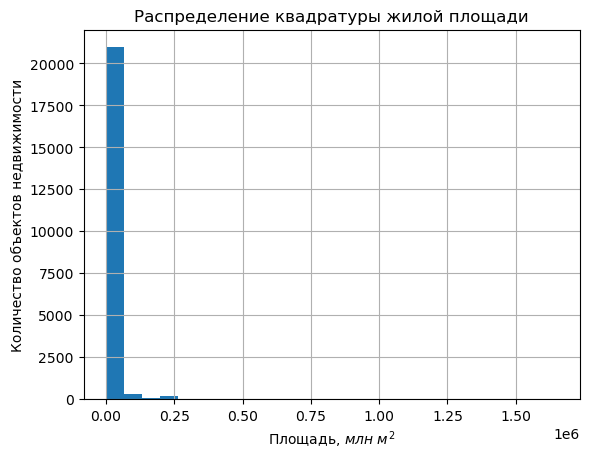

In [9]:
plt.hist(df.sqft_lot, bins=25)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Площадь, $млн$ $м^2$')
plt.ylabel('Количество объектов недвижимости');
plt.grid()

### Из графика видно, что выбросов очень много.
### Ограничим площадь недвижимости 100000 квадратных метров для удобства анализа:

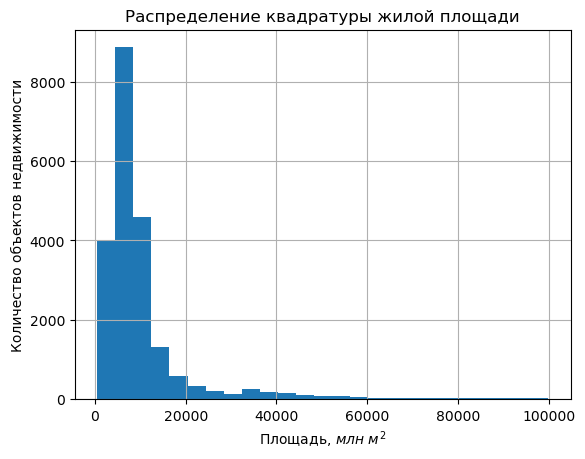

In [10]:
plt.hist(df.sqft_lot[df.sqft_lot < 100000], bins=25)
plt.title('Распределение квадратуры жилой площади')
plt.xlabel('Площадь, $млн$ $м^2$')
plt.ylabel('Количество объектов недвижимости');
plt.grid()

#### Итак, видно, что большая часть объектов недвижимости приходится на объекты с площадью около 7.5-10 тыс квадратных метров


### 2.1.4 Изучите распределение года постройки

In [11]:
df['yr_built'].value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [12]:
df.agg({'yr_built': ['min', 'mean', 'max']}).style.format(precision=0, thousands=' ')

,yr_built
min,1 900
mean,1 971
max,2 015


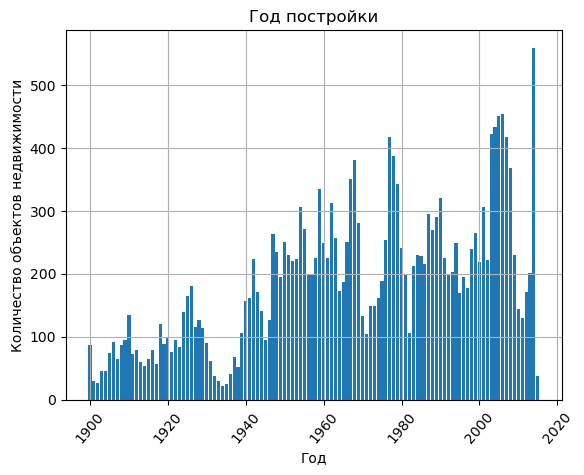

In [13]:
data = df['yr_built'].value_counts()
plt.bar(data.index, data.values)
plt.xticks(rotation=50)
plt.xlabel('Год')
plt.ylabel('Количество объектов недвижимости')
plt.title('Год постройки')
plt.grid();

### Из графика видно, что рост постройки недвижимости с 1900 по 2015 гг. имеет тенденцию к увеличению, за исключением конца периода, где наблюдается резкий спад.

### 2.1 Изучите распределение домов от наличия вида на набережную

In [14]:
df['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

### Посмотрим, какой процент домов имеют вид на набережную.

In [15]:
data = pd.DataFrame(df.waterfront.value_counts(normalize=True)*100)
data.rename(index={0: 'No', 1: 'Yes'}, inplace=True)
data.style.format(precision=2)

,waterfront
No,99.25
Yes,0.75


#### Распределение домов в зависимости от вида на набережную следующее: только 0.8 % всех объектов имеют вид. Подавляющее количество домов вида на набережную не имеют.

#### Ограничиваться эти выводом не стоит. В целях анализа цены используем boxplot:

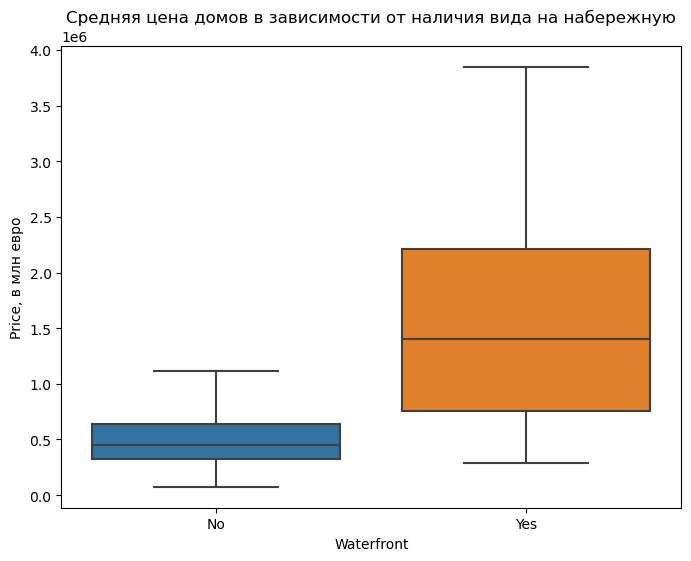

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['waterfront'], y=df['price'], showfliers=False);
plt.ylabel('Price, в млн евро')
plt.xticks(ticks=[0, 1], labels=['No','Yes'])
plt.title('Средняя цена домов в зависимости от наличия вида на набережную')
plt.xlabel('Waterfront');

#### Можно сделать следующие выводы:
- Наличие вида на набережную значительно поднимает цену жилья;
- Среднее значение цены на жильё становится 1.3 млн евро (500 тыс без вида);
- Видно, что 99,6% всех значений цены лежат в пределах 4 млн евро, если рассматривать недвижимость с видом на набережную;
- В случае, если вида на набережную нет, то 99,6% таких объектов недвижимости имеют цену ниже 1.2 млн евро.
#### Как показывают исследования, наличие вида на набережную имеет весомое воздействие на цену жилья. И это нужно тоже учитывать при глубоком анализе.

### 2.2 Изучите распределение этажей домов

In [17]:
df['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

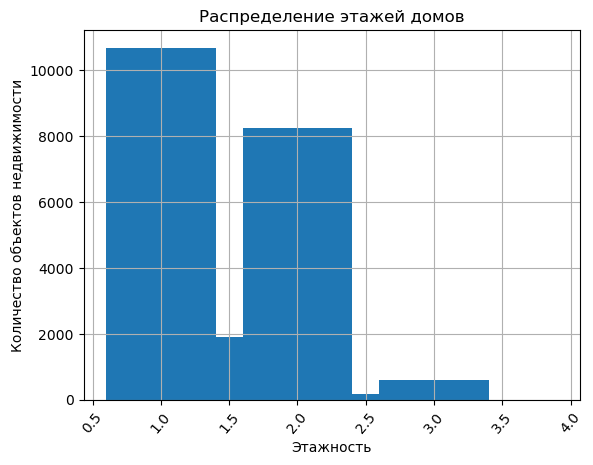

In [18]:
data1 = df['floors'].value_counts()
plt.bar(data1.index, data1.values)
plt.xticks(rotation=50)
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Этажность')
plt.title('Распределение этажей домов')
plt.grid();

#### Видно, что большим спросом пользуются одноэтажные и двухэтажные дома, наличием их доступности по цене

### 2.2 Изучите распределение состояния домов

In [19]:
condition_houses = df['condition'].value_counts()
condition_houses.sort_values()

1       30
2      172
5     1701
4     5679
3    14031
Name: condition, dtype: int64

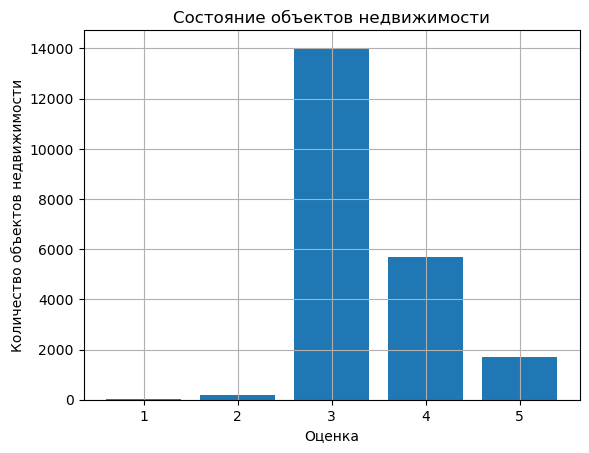

In [20]:
condition_houses = df['condition'].value_counts()
plt.bar(condition_houses.index, condition_houses.values)
plt.ylabel('Количество объектов недвижимости')
plt.xlabel('Оценка')
plt.title('Состояние объектов недвижимости')
plt.grid();

#### Для наглядности приведём данные в % - ном соотношении:

In [21]:
condition_houses  = pd.DataFrame(df.condition.value_counts(normalize=True)*100)
condition_houses .style.format(precision=2)

,condition
3,64.92
4,26.28
5,7.87
2,0.80
1,0.14


#### Вывод: большинство домов в удовлетворительном состоянии 65%, 26% - в хорошем состоянии, и 8% - в отличном. Домов в состоянии "2" и "1" очень мало - в сумме меньше 1%.

### Условие 3: 3 задача
### Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
### Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

##### Проведём анализ. Посмотрим какие наиболее решающие факторы влияли при приобретении объекта недвижимости.

##### Построим матрицу корреляции:

In [22]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix 

/var/folders/vj/thnrnyp91pd4jd5ldj01q_dr0000gn/T/ipykernel_12161/1419217228.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


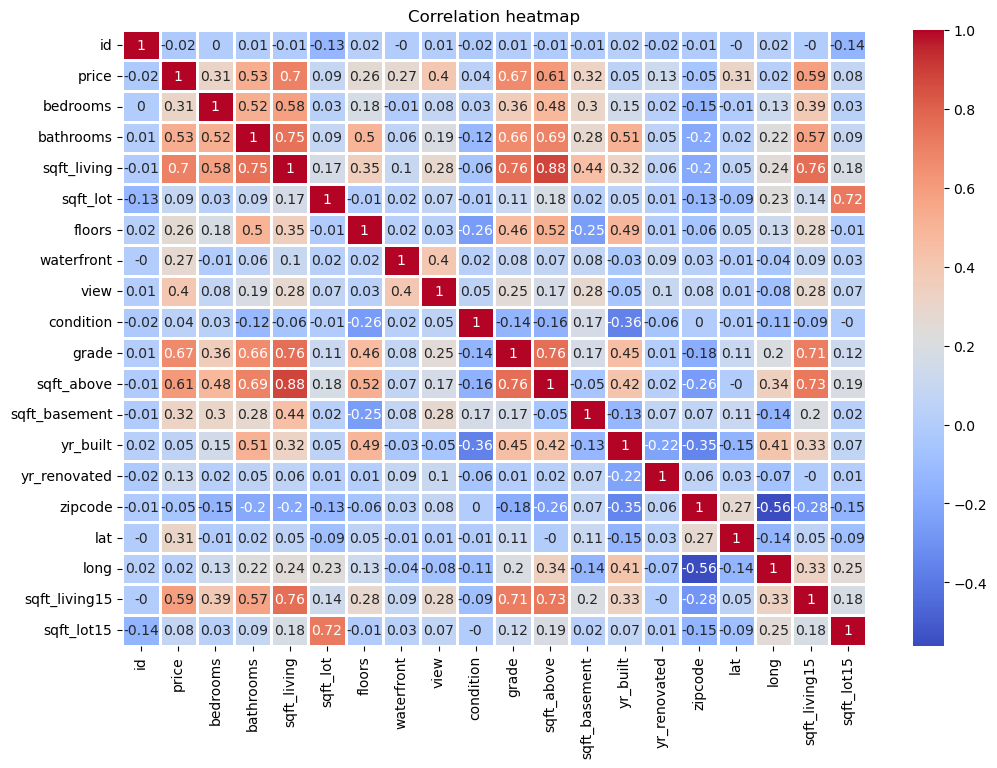

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, linewidth=1, cmap='coolwarm')
plt.title('Correlation heatmap');

#### Выделим некоторые факторы, где наблюдалась значительная корреляция между факторами и опишем их.

#### Известно, что наиболее решающим фактором является цена. Посмотрим как коррелировали с ней другие факторы. Построим матрицу корреляций с ценой:

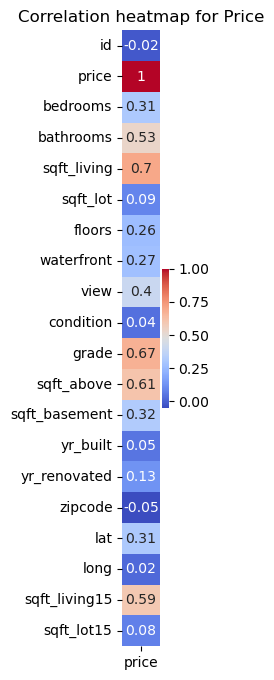

In [24]:
corr_matrix2 = corr_matrix[corr_matrix.index == 'price'].copy()
corr_matrix2 = corr_matrix2.transpose()
plt.figure(figsize=(0.6, 8))
sns.heatmap(corr_matrix2, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap for Price');

#### По степени корреляции видим, что сильную прямую зависимость с ценой показывают следующие факторы:

- Общая площадь дома (0,7);
- Оценка дома (0.7);
- Средняя площадь дома у ближайших 15 соседей участка (0.6);
- Площадь дома без учета подвала (0.6);
- Количество санузлов (0.5);
- Наличие вида (0.4).
#### Значительной отрицательной корреляции не установлено, что говорит о важности данного фактора как "цена".

#### Теперь рассмотрим влияние некоторых из них на цену. Произведём кросс-анализ.

### Зависимость цены от общей площади дома

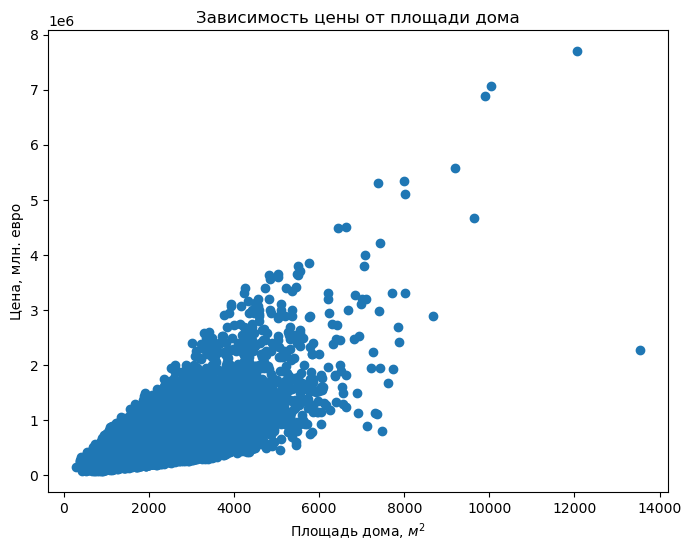

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(df['sqft_living'], df['price'])
plt.title('Зависимость цены от площади дома')
plt.xlabel('Площадь дома, $м^2$')
plt.ylabel('Цена, млн. евро');

#### Построим модель и ограничим выбросы до 8000 в целях удобства:

In [26]:
x1 = np.array(df.sqft_living[df.sqft_living < 8000])
y1 = np.array(df.price[ df.sqft_living< 8000])
x1, y1

(array([1180, 2570,  770, ..., 1020, 1600, 1020]),
 array([221900., 538000., 180000., ..., 402101., 400000., 325000.]))

In [27]:
model1 = LinearRegression()
x1_r = x1.reshape(-1, 1)
mod1 = model1.fit(x1_r, y1)
mod1.intercept_, mod1.coef_[0]

(-23992.143301946926, 270.65417317822244)

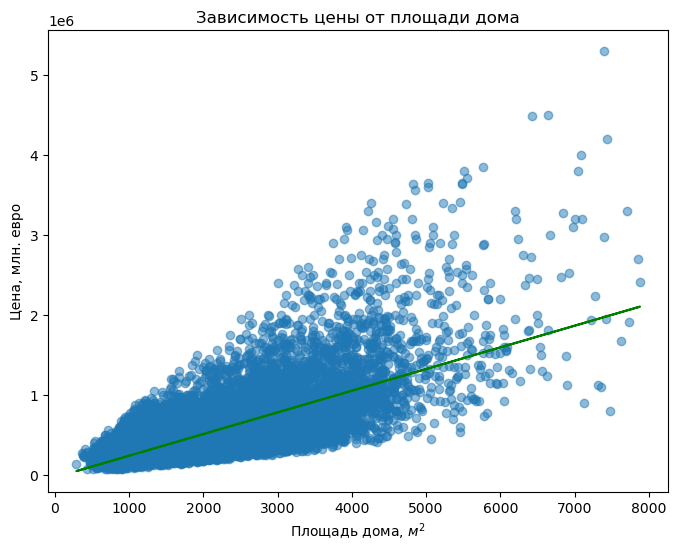

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(df.sqft_living[df.sqft_living < 8000], df.price[df.sqft_living < 8000], alpha=0.5)
plt.plot(x1, (mod1.intercept_ + mod1.coef_[0]*x1), color='green')
plt.title('Зависимость цены от площади дома')
plt.xlabel('Площадь дома, $м^2$')
plt.ylabel('Цена, млн. евро');

#### Чётко заметно на графике зависимость цены от площади дома. При чём при увеличении площади корреляционная зависимость уменьшается. Каждый дополнительный квадратный метр дома обходится в среднем 270 долларов.

## Зависимость цены от оценки дома

#### Посмотрим оценки домов разных экспертов:

In [33]:
grade = pd.DataFrame(df.grade.value_counts()).sort_index()
grade

,grade
1,1
3,3
4,29
5,242
6,2038
7,8981
8,6068
9,2615
10,1134
11,399


### Для наглядности построим гистограмму:

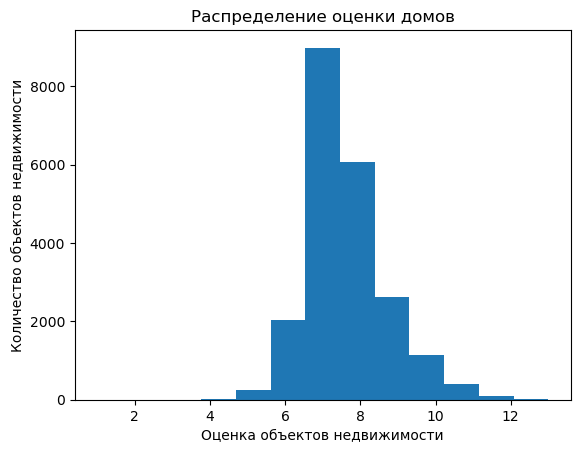

In [34]:
plt.hist(df['grade'], bins=13)
plt.title('Распределение оценки домов')
plt.xlabel('Оценка объектов недвижимости')
plt.ylabel('Количество объектов недвижимости');

### Визуально видно, что оценки домов имеют близкое к нормальному распределение. Потвердим это, построив boxplot:

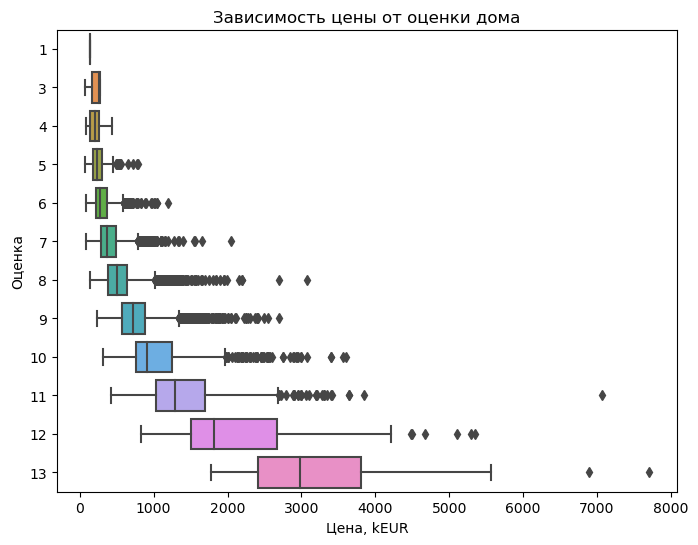

In [35]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df.grade, x=df.price/1000, whis=1.5, orient='h')
plt.title('Зависимость цены от оценки дома')
plt.xlabel('Цена, kEUR')
plt.ylabel('Оценка');

#### Как и видно, существует сильная зависимость цены на дом в зависимости от оценки. При этом категории 1 и 2 практически не отличаются. При этом чем сильнее оценён дом, чем дороже он стоит. Прямая зависимость налицо.

## Зависимость цены от наличия вида

In [36]:
view = pd.DataFrame(df.view.value_counts(normalize=True)*100)
view.style.format(precision=2)

,view
0,90.17
2,4.46
3,2.36
1,1.54
4,1.48


### Наглядно видно, что 90% домов не имеют вида совсем или практически (0).

### Посмотрим, есть ли зависимость этого показателя от вида на набережную.

In [37]:
view = pd.crosstab(index=df['view'], columns=df['waterfront'])
view

waterfront,0,1
view,,
0,19489,0
1,331,1
2,955,8
3,491,19
4,184,135


#### Вывод: практически все дома с видом на набережную имеют лучшую (4) или близкую к наилучшей (3) оценку вида.

#### Построим зависимость цены от наличия вида:

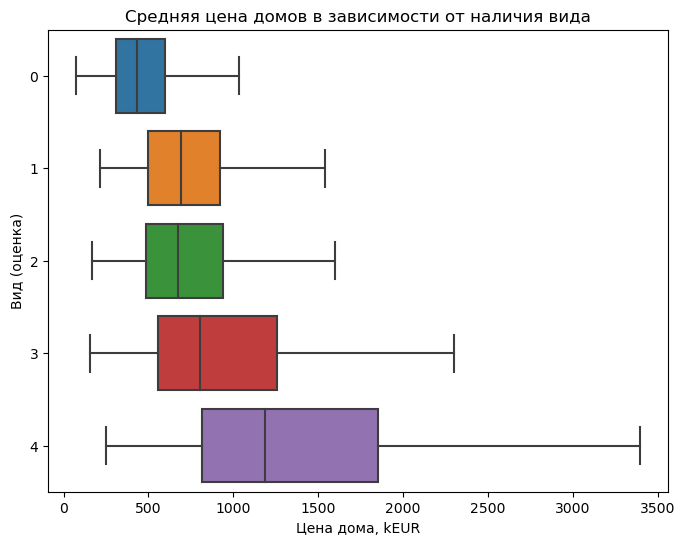

In [38]:
plt.figure(figsize=(8, 6))

sns.boxplot(y=df.view, x=df.price/1000, orient='h', showfliers=False)
plt.xlabel('Цена дома, kEUR')
plt.ylabel('Вид (оценка)')

plt.title('Средняя цена домов в зависимости от наличия вида');

#### По наблюдениям видно, что существует сильная зависимость цены на дом в зависимости от наличия вида. При этом категории 1 и 2 практически не отличаются. Чем дороже дом, тем выше вид(оценка) у дома.

#### Напоследок рассмотрим такой интересный показатель как *'влияние жилой площади ближайших 15 домов'.*

In [39]:
df['sqft_living15'].value_counts().sort_values()

2927      1
2456      1
1516      1
1427      1
2616      1
       ... 
1460    169
1500    181
1560    192
1440    195
1540    197
Name: sqft_living15, Length: 777, dtype: int64

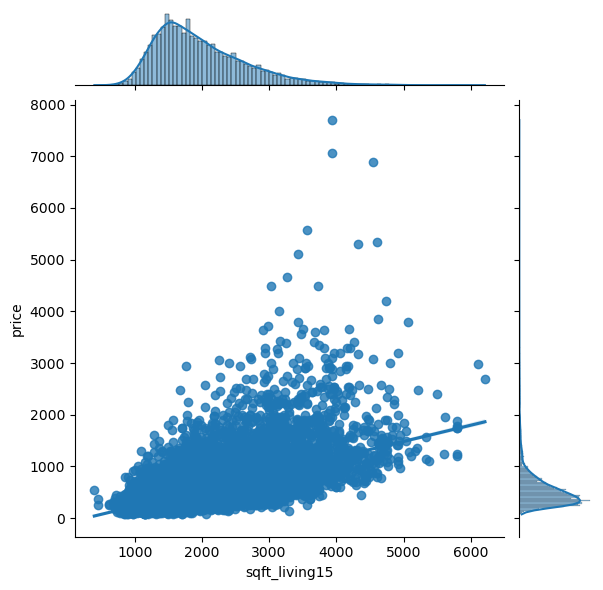

In [40]:
sns.jointplot(x=df['sqft_living15'], y=df['price']/1000, kind='reg');

#### Однозначно сложно проанализировать в точности влияние фактора 'sqft_living15' на цену, но, в общем, зависимость между показателями достаточно значительная. Все выбросы скопленны рядом друг с другом. Скорее зависимость линейная. Наглядно по графику видно, что дома стоимостью до 2 млн. евро плотно заселены(выбросы показывают эту тенденцию на графике).

#### Данный проведённый анализ является лишь простым. Для более детального исследования, скорее нужно применять сложные модели машинного обучения.